# Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [2]:
sns.set_context('talk')

# Load data

In [3]:
train = pd.read_pickle('train')

# Prepare data

In [6]:
# Target is whether the virus is detected
y = pd.to_numeric(train.WnvPresent.values)

In [7]:
# Remove unusable features from dataset
X = train.drop(
    ['Date', 'Trap', 'NumMosquitos', 'WnvPresent', 'Species', 'Zone'], axis=1)

In [8]:
# Split data preserving label ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y)

In [9]:
# Use borderline SMOTE to fix class imbalance
X_resampled, y_resampled = SMOTE(kind='borderline1').fit_sample(X_train,
                                                                y_train)

# Random forest grid search

In [10]:
# Define random forest classifier, a parameter grid,
# and a grid search cv to find the best parameters for the
# random forest, try to maximize auc.
clf = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 20, 50],
    'min_samples_leaf': [1, 20, 50]
}

cv_clf = GridSearchCV(clf, param_grid, 'roc_auc', verbose=2)

cv_clf.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, total=  14.2s
[CV] max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s


[CV]  max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, total=  15.0s
[CV] max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, total=  14.8s
[CV] max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=20 
[CV]  max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=20, total=  13.8s
[CV] max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=20 
[CV]  max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=20, total=  14.6s
[CV] max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=20 
[CV]  max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=20, total=  14.5s
[CV] max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=50 
[CV]  max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=50, total=  13.7s
[CV] max_de

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=2, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=20, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=50 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, total=   1.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=50 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=50, min_samples_split=50, total=   1.2

[CV]  max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=20, total=   5.7s
[CV] max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=20 
[CV]  max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=20, total=   5.7s
[CV] max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=50 
[CV]  max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=50, total=   5.4s
[CV] max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=50 
[CV]  max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=50, total=   5.6s
[CV] max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=50 
[CV]  max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=50, total=   5.5s
[CV] max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=2 
[CV]  max_depth=5, max_features=None, min_samples_leaf=50, min_samples_split=2, total=   5.3s
[CV] max_depth=5, max_features=N

[CV]  max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=50, total=   0.6s
[CV] max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=50 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=50, total=   0.6s
[CV] max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=2 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=2, total=   0.6s
[CV] max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=2 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=2, total=   0.6s
[CV] max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=2 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=2, total=   0.6s
[CV] max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=20 
[CV]  max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=20, total=   0.6s
[CV] max_depth=5, max_features=log2, mi

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, total=   1.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, total=   1.3s
[CV] max_depth=10, max_features=sqr

[CV]  max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=2, total=   0.8s
[CV] max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=20, total=   0.8s
[CV] max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=20, total=   0.9s
[CV] max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=20 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=20, total=   0.9s
[CV] max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50, total=   0.9s
[CV] max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50 
[CV]  max_depth=10, max_features=log2, min_samples_leaf=50, min_samples_split=50, total=   0.8s
[CV] max_depth=10, m

[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=20 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=50, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=50, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=50 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=20, min_samples_split=50, total=   1.4s
[CV] max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=2 
[CV]  max_depth=20, max_features=sqrt, min_samples_leaf=50, min_samples_split=2, total=   1.2s
[CV] max_depth=20, ma

[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 22.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'sqrt', 'log2'], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 20, 50], 'min_samples_leaf': [1, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=2)

In [11]:
print(cv_clf.best_params_)

{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Random forest with best parameters

In [12]:
# Now up the estimators in the random forest, and apply the best parameters
clf = RandomForestClassifier(
    n_estimators=1000, max_features=None, random_state=42)

clf.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [13]:
# Make predictions
clf_probs = clf.predict_proba(X_test)
sig_score = log_loss(y_test, clf_probs)

y_pred = clf.predict(X_test)

# Metrics

In [14]:
# Log loss
print(sig_score)

0.422426059562


In [15]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      2489
          1       0.26      0.28      0.26       138

avg / total       0.92      0.92      0.92      2627



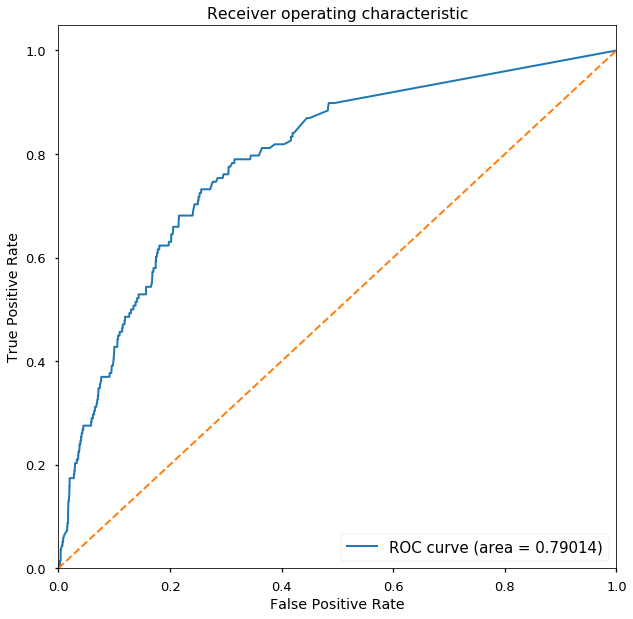

In [16]:
# ROC and AUC
fpr, tpr, _ = roc_curve(y_test, clf_probs[:,1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(10, 10))
lw = 2
ax.plot(fpr, tpr,
         lw=lw, label=f'ROC curve (area = {roc_auc:.5f})')
ax.plot([0, 1], [0, 1], lw=lw, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
ax.legend(loc="lower right", fontsize=15)
plt.show()
fig.tight_layout()
fig.savefig(join('plots', 'RanFor', 'ROC.png'))

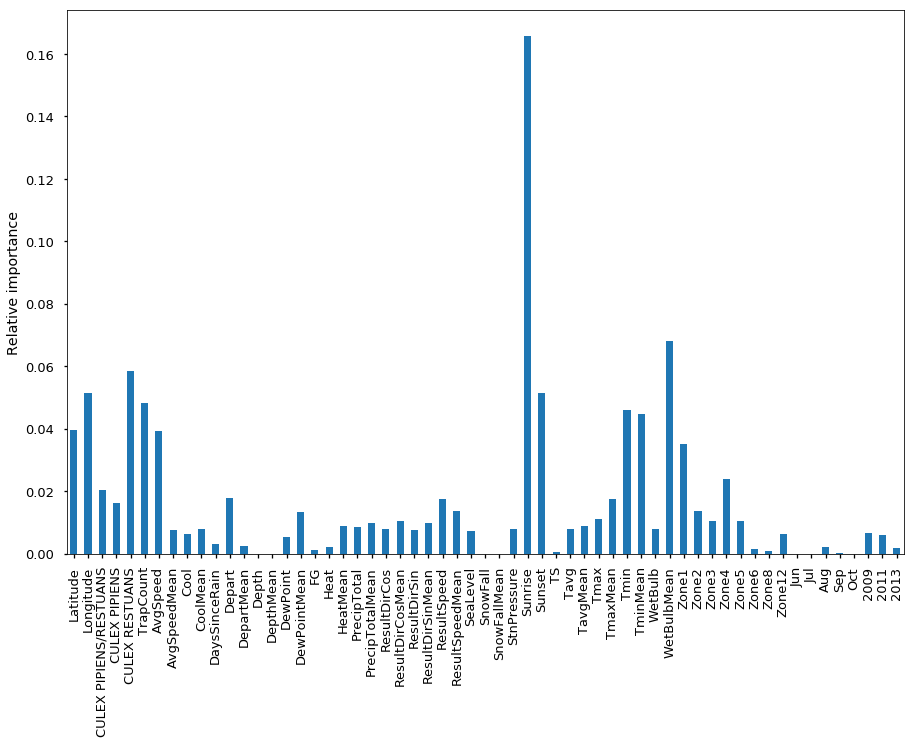

In [17]:
# Plot relative importance of features to model
fig, ax = plt.subplots(figsize=(15,10))
pd.Series(clf.feature_importances_ , index=X.columns).plot(kind='bar', ax=ax)

ax.set_ylabel('Relative importance')

plt.show()
fig.tight_layout()
fig.savefig(join('plots', 'RanFor', 'importances.png'))